In [1]:
# imports
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# display settings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 500)

---

#### loading

In [2]:
# read the data
# index_col -> set index to 'Date'
# thousands -> recognize '1,000' as an int64 instead of a string
# na_values -> replace any '--' values with NA
# usecols -> only use relevant columns

df = pd.read_csv('data/data.csv', parse_dates=['Date'], infer_datetime_format=True,
                index_col='Date', thousands=',', na_values='--',
                usecols=['Date', 'Activity Type', 'Distance', 'Calories', 'Time',
                            'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence',
                            'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
                            'Avg Stride Length', 'Best Lap Time', 'Number of Laps',
                            'Moving Time', 'Elapsed Time', 'Min Elevation',
                            'Max Elevation'])


---

#### exploring

In [3]:
# take a peek!
df.head(3)

,Activity Type,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
Date,,,,,,,,,,,,,,,,,,,,
2022-10-27 10:15:19,Running,6.01,596,00:49:46,164,185,4.2,167,178,8:17,7:34,7.0,10.0,1.17,00:03.61.1,7,00:49:40,00:52:59,594.0,604.0
2022-10-26 14:37:25,Running,4.01,362,00:34:26,150,161,3.1,165,175,8:34,7:02,3.0,7.0,1.13,00:06.44.8,5,00:34:23,00:36:17,594.0,603.0
2022-10-23 14:02:20,Running,6.38,650,00:54:40,167,176,4.8,165,174,8:34,7:44,7.0,3.0,1.14,03:03.34.5,7,00:54:37,00:55:53,594.0,604.0


my watch allowed for multiple activity types

In [4]:
df['Activity Type'].unique()

array(['Running', 'Other', 'Cycling', 'Treadmill Running'], dtype=object)

In [6]:
df.shape[0]

789

since first getting this watch i completed 789 _activities_

In [7]:
df[(df['Activity Type'] == 'Cycling') | (df['Activity Type'] == 'Other')].shape[0]

26

26 were classified as _cycling_ or _other_. i'd like to discard those values

In [8]:
dropIndex = df[(df['Activity Type'] == 'Cycling') | (df['Activity Type'] == 'Other')].index
df.drop(dropIndex, inplace=True)

i also only want the data leading up to my 100 miler, which occurred february 5th, 2022. my first recorded run with this watch was april 9th, 2018. so for simplicity, i'll select the data from april 2018 to march 2022.

_it took almost four years of training for me to go from someone who __doesn't__ run to completing a 100 mile marathon... big things take time._

In [9]:
df.sort_values('Date', inplace=True)
df = df['2018-04-01':'2022-03-01'].copy(deep=True)

---

#### nerding

In [10]:
df.head(3)

,Activity Type,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
Date,,,,,,,,,,,,,,,,,,,,
2018-04-09 15:08:48,Running,8.04,1088,01:07:47,172,187,5.0,161,175,8:26,6:54,203.0,205.0,1.19,00:00.00,9,01:07:48,01:08:00,69.0,139.0
2018-04-11 15:12:50,Running,5.06,640,00:45:25,170,188,5.0,157,178,8:59,7:54,373.0,381.0,1.14,00:00.00,6,00:45:25,00:46:20,328.0,463.0
2018-04-12 14:07:03,Running,5.98,704,00:49:09,176,195,5.0,167,213,8:13,5:07,567.0,557.0,1.17,00:00.00,18,00:48:29,00:56:09,365.0,458.0


In [11]:
print(f"How long did it take to train for your first 100 miler? {(df.index.max() - df.index.min()).days} days.")

How long did it take to train for your first 100 miler? 1397 days.


In [12]:
print(f"How many miles did you run to train for that? {df['Distance'].sum().round(2)} miles")

How many miles did you run to train for that? 5617.14 miles


what makes this data incredibly fun to explore is that each run for me is a memory. and since i never really ran before getting this watch, you can see how i developed through time as a runner. take a look at the time series of my runs below:

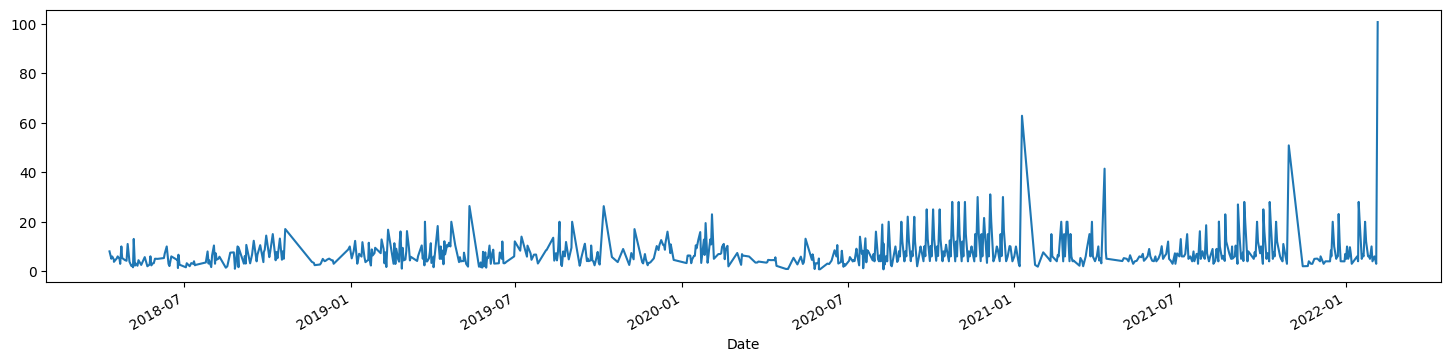

In [64]:
df['Distance'].plot(figsize=(18,4));

race days are skewing the data but my consistency really started to develop from 2020 onwards. let's zoom in there...

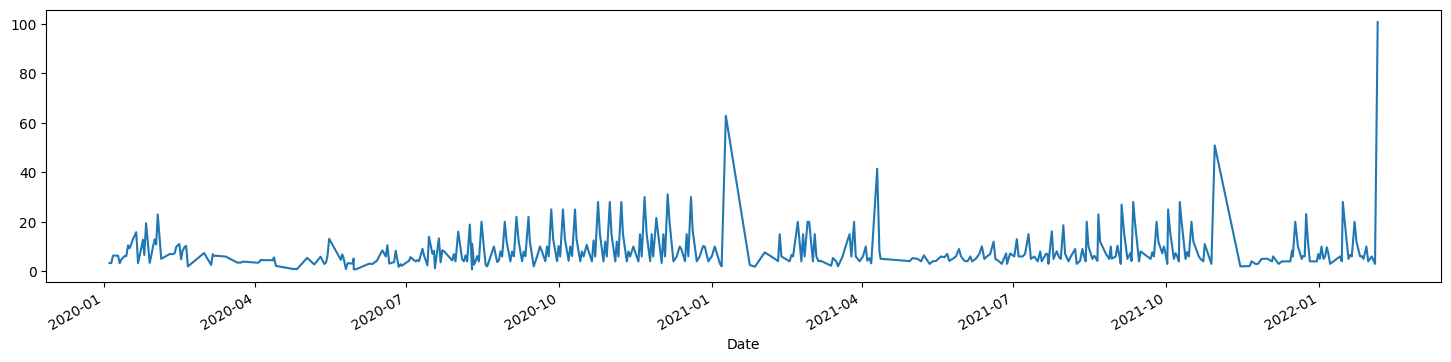

In [62]:
df['2020':]['Distance'].plot(figsize=(18,4));

the build and consistency from july until that first 100k is really beautiful to see.

__insert bit about training plans...__

but what is also important is to see the days where I didn't run. i.e. **still need to add this in.**

note the distribution of my mileage. my average run was about seven miles. but weekend long runs helped build my base and push my limit. those few ultras leading up my 100 miler helped as well:

In [65]:
# all data, average distance
df['Distance'].mean()

7.611300813008129

In [66]:
# post 2020 average distance increased slightly
df['2020':]['Distance'].mean()

8.415022935779817

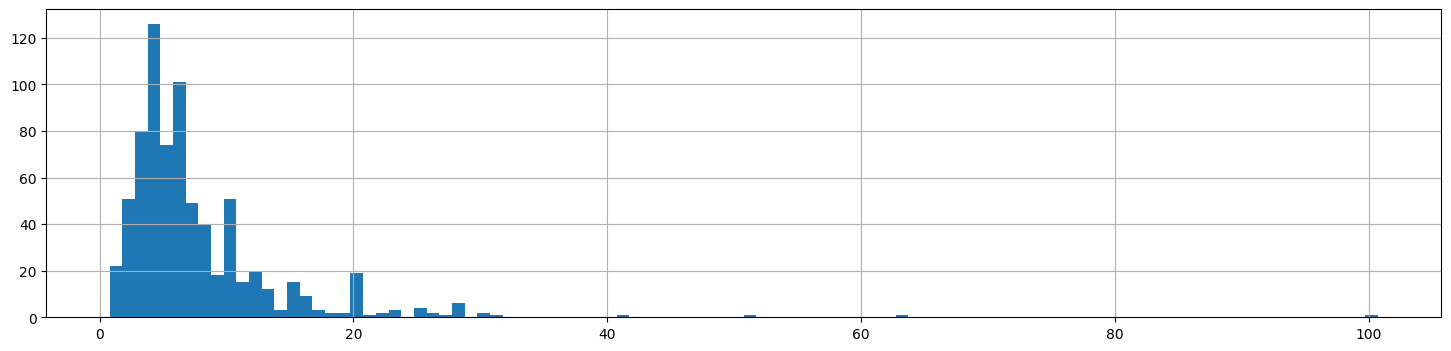

In [69]:
df['Distance'].hist(bins=100, figsize=(18,4));

#### Monthly sum

2022 onwards i just started running _more_

<AxesSubplot: xlabel='Date'>

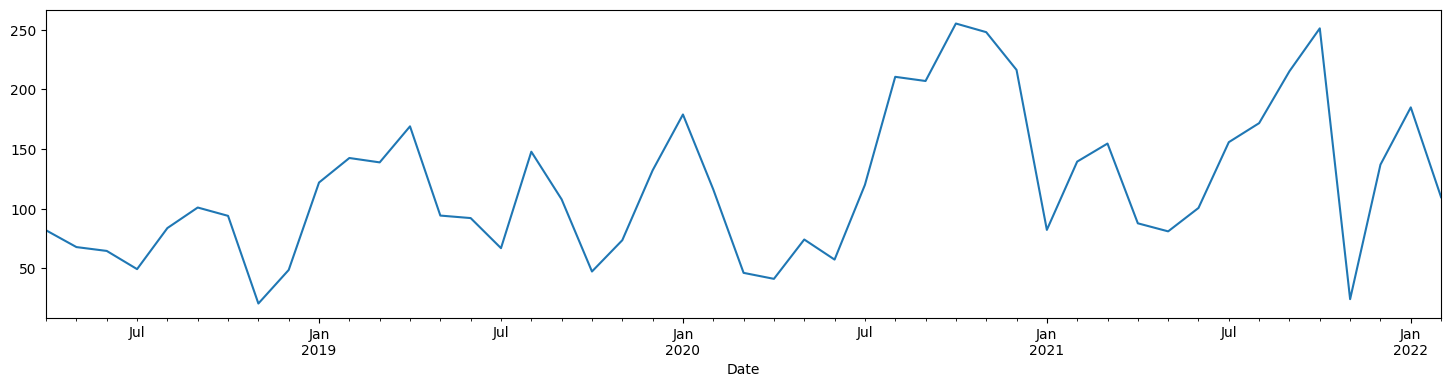

In [70]:
df.resample(rule='M')['Distance'].sum().plot(figsize=(18,4))

#### Weekly sum

<AxesSubplot: xlabel='Date'>

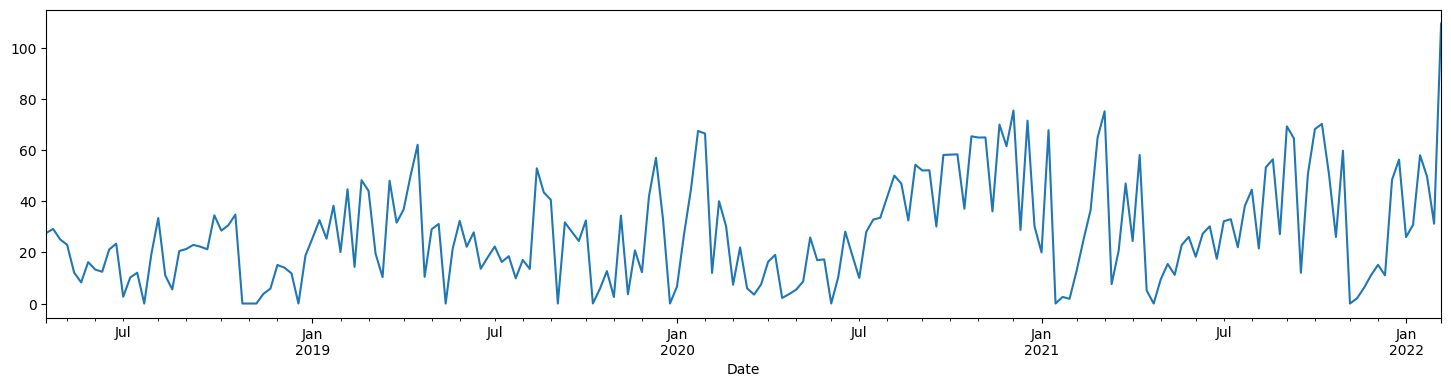

In [71]:
df.resample(rule='W')['Distance'].sum().plot(figsize=(18,4))

Race days were as follows:

####

| Date | Distance (Miles) | Distance (Kilometers) | Name |
| ------------------------- | :----: | :----: | :--------------------------: |
| May 6, 2018               | 13.10  | 21.08  | Providence Half Marathon |
| May 11, 2019              | 26.20  | 42.16  | Maine Coastal Marathon |
| October 6, 2019           | 26.20  | 42.16  | Milwaukee Lakefront Marathon |
| January 9, 2021           | 62.13  | 100.00 | Bandera 100K |
| April 10, 2021            | 62.13  | 100.00 | Zion 100K |
| October 30, 2021          | 50.00  | 80.46  | Chicago Lakefront 50 Miler |
| February 5, 2022          | 100.00 | 160.93 | Rocky Raccoon 100 Miler |


---

#### Developing...

notes:

* Date also has the time of day... do I usually run in the morning or evening?

* Avg Pace, Best Pace and Time are str with values that make them difficult to directly convert to seconds or a time delta format. Interestingly Time can be sorted, but can't be summed. An example filter such as the following doesn't work because of certain values...

* I currently only have rows on days that I ran. For plotting purposes I'd also like to see days I didn't run for identifying rest days or bad streaks where maybe I was sick.

* My first run was April 9th 2018 and my 100 Miler was February 5th 2022. But I wasn't training for the 100 miler on April 9th, I was just training for the Providence half marathon. I can add colored sections to a chart to denote what race I was training for... Providence Half, Kennebunkport Full, Milwaukee Full, Zion 100K, Bandera 100K, Chicago 50M, Rocky Raccoon 100M. It's important to recognize this for calculating an accuracy score as well.

* Add some smoothing, maybe rolling average of 7 day mileage.


Avg Pace                  1.1
Best Pace                 3.3

df['Avg Pace t'] = '00:' + df['Avg Pace']
df['Avg Pace t'] = pd.to_timedelta(df['Avg Pace t'])

Additional Time Anomolies

2020-08-09 15:03:25    00:07:15.4
2020-05-31 17:36:04    00:06:40.1
2020-05-30 11:28:19    00:06:37.4
2020-04-26 08:23:53    00:07:36.1
2020-04-26 07:44:59    00:08:40.3
2020-04-24 06:33:32    00:08:32.1
2020-04-24 06:03:26    00:08:06.9
2019-02-25 19:31:49    00:09:29.9
2018-08-25 19:30:52    00:07:17.2

Removed several columns:
* Favorite
* Title
* Avg Vertical Ratio
* Avg Vertical Oscillation
* Avg Ground Contact Time
* Avg Run Cadence.1
* Max Run Cadence.1
* Training Stress Score®
* Avg Power
* Max Power
* Grit
* Flow
* Avg. Swolf
* Avg Stroke Rate
* Total Reps
* Dive Time
* Min Temp
* Surface Interval
* Decompression
* Max Temp
* Avg Pace t